# Transformações

Neste tutorial vamos trabalhar com transformações de imagens. Algumas delas já foram trabalhadas na aula passada e serão passadas novamente aqui. O processo de transformação de imagens consiste em modificar a matriz que representa a imagem com o intuito de aplicar alterações certas modificações às imagens.

Nesta etapa da disciplina estaremos preocupados em estudar as transformações geométricas. 

## Resolução Espacial

In [16]:
# Importando os pacotes necessários
import scipy
import math
import numpy as np
from scipy import misc
from matplotlib.pyplot import imshow
from scipy.misc.pilutil import Image

# Força ao matplot plotar as imagens no Jupyter Notebook
%matplotlib inline

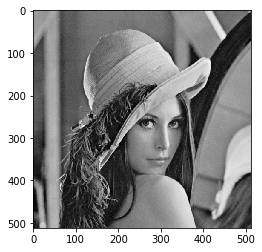

In [4]:
# Carregando a imagem
gray_image = Image.open('../images/lena.png')

gray_image = np.asarray(gray_image)

# Exibindo uma imagem em preto e branco
imshow(gray_image, cmap='gray')

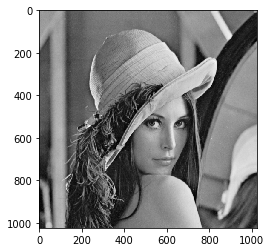

In [5]:
# Aumentar 

tamanho_imagem = gray_image.shape

fator = 2

M = tamanho_imagem[0]*fator
N = tamanho_imagem[1]*fator

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = int(i/fator)
        new_j = int(j/fator)
        new_image[i, j] = gray_image[new_i, new_j]

imshow(new_image, cmap='gray')

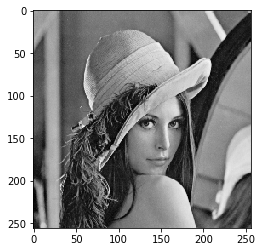

In [6]:
# Reduzindo a Imagem

M = int(tamanho_imagem[0]/fator)
N = int(tamanho_imagem[1]/fator)

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = int(i*fator)
        new_j = int(j*fator)
        new_image[i, j] = gray_image[new_i, new_j]

imshow(new_image, cmap='gray')

## Rotação 90, 180 e 270

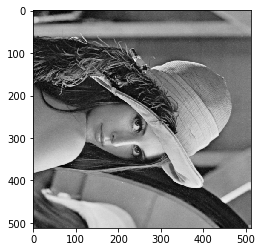

In [7]:
# Girando a imagem 90

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((N, M),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_image[j, (M-1)-i] = gray_image[i, j]

imshow(new_image, cmap='gray')

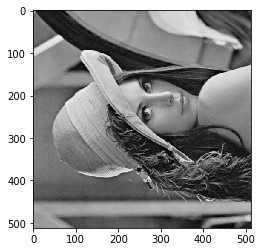

In [8]:
# Girando a imagem 270

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((N, M),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_image[(N-1)-j, i] = gray_image[i, j]

imshow(new_image, cmap='gray')

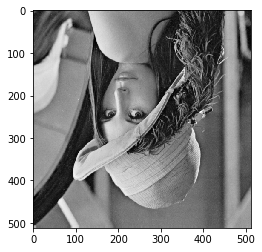

In [9]:
# Girando a imagem 180

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_image[(M-1)-i, (N-1)-j] = gray_image[i, j]

imshow(new_image, cmap='gray')

## Translação

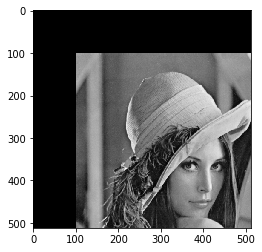

In [10]:
# Translação

delta = 100

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = i + delta
        new_j = j + delta
        
        if(new_i < N and new_j < M):
            new_image[new_i, new_j] = gray_image[i, j]

imshow(new_image, cmap='gray')

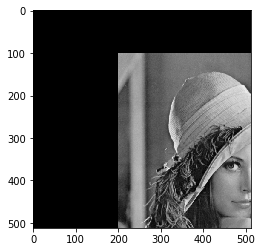

In [11]:
# Translação deltas distintos

delta_i = 100
delta_j = 200

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = i + delta_i
        new_j = j + delta_j
        
        if(new_i < N and new_j < M):
            new_image[new_i, new_j] = gray_image[i, j]

imshow(new_image, cmap='gray')

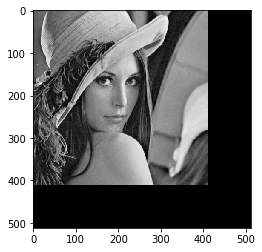

In [12]:
# Translação delta negativo

delta = -100

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = i + delta
        new_j = j + delta
        
        if(new_i >= 0 and new_j >= 0):
            new_image[new_i, new_j] = gray_image[i, j]

imshow(new_image, cmap='gray')

## Cropping

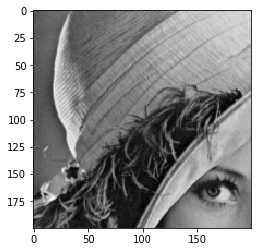

In [13]:
origem = (100, 100)
delta = 200

new_image = gray_image[origem[0]:(origem[0]+delta),origem[1]:(origem[1]+delta)]

imshow(new_image, cmap='gray')

# Rotação de Imagens com ângulo

A imagem a seguir ilustra o processo de rotação no sentido anti-horário por um ângulo $\beta$ a partir do ponto $(0,0)$. O objetivo na rotação é encontrar as novas cordenadas $(x',y')$ a partir do ângulo de rotação e as coordenadas conhecidas: $(x, y)$. Para isso, vamos utilizar conceitos de trigonometria para definir as equações que permitem tal transformação. Vale ressaltar que essa equação depende do ponto que é considerado como origem e o sentido da rotação.

<img src="http://adolfo.data2learning.com/disciplinas/computacaovisual/images/graph_rotation.png" />

A partir do exemplo da imagem podemos definir que: 

$sen(\alpha) = \frac{cateto oposto}{hipotenusa} = \frac{y}{r}$ e $cos(\alpha)= \frac{catetoadjacente}{hipotenusa} = \frac{x}{r}$,

onde $r$ é o valor do vetor que sai do ponto $(0,0)$ e encontra o ponto $(x,y)$.

De forma semelhante podemos definir que:

$sen(\alpha + \beta) = \frac{y'}{r}$ e $cos(\alpha + \beta) = \frac{x'}{r}$,

onde $r$, neste caso, é o valor do vetor que sai do ponto $(0,0)$ e encontra o ponto $(x',y')$.

Com isso podemos definir os valores para $x$, $y$, $x'$ e $y'$.

$x = r * cons(\alpha)$

$y = r * sen(\alpha)$

$x' = r * cons(\alpha + \beta)$

$y' = r * sen(\alpha + \beta)$

Mesmo tendo as equações para cada coordenada não é possível definir os valores de $x'$ e $y'$ já que o valor de $r$ não é conhecido. Para determinar tais valores podemos escrever as equações de $x'$ e $y'$ devem ser escritos em função de $x$ e $y$.

Isso pode ser feito a partir das relações:

$sen(\alpha + \beta) = cos(\alpha) * sen(\beta) + sen(\alpha)*cos(\beta)$

$cos(\alpha + \beta) = cos(\alpha) * cos(\beta) - sen(\alpha)*sen(\beta)$

Com isso, temos:

$x' = r * (cos(\alpha) * cos(\beta) - sen(\alpha)*sen(\beta))$

$y' = r * (cos(\alpha) * sen(\beta) + sen(\alpha)*cos(\beta))$

multiplicando r, temos:

$x' = r * cos(\alpha) * cos(\beta) - r * sen(\alpha)*sen(\beta)$

$y' = r * cos(\alpha) * sen(\beta) + r * sen(\alpha)*cos(\beta)$


Substituindo pelos valoes de $x$ e $y$, temos:

$x' = x * cos(\beta) - y * sen(\beta)$

$y' = x * sen(\beta) + y * cos(\beta)$

Com essas funções podemos definir os novos valores de $x'$ e $y'$.

Dessa mesma forma podemos definir as equações para as imagens que queremos rotacionar. No entanto, diferente do que foi feito no exemplo acima, o ponto $(0, 0)$ é no canto superior esquerdo. 

### Rotação no sentido horário 

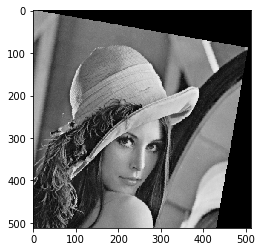

In [18]:

gray_image = Image.open('../images/lena.png')

gray_image = np.asarray(gray_image)

angulo = math.radians(10)

tamanho_imagem = gray_image.shape

new_image = np.zeros(tamanho_imagem, dtype='uint8')

M = tamanho_imagem[0]
N = tamanho_imagem[1]

for i in range(0, M):
    for j in range(0, N):
        
        x = int(i * math.cos(angulo) - j * math.sin(angulo))
        y = int(i * math.sin(angulo) + j * math.cos(angulo))
        
        if(x >= 0 and y >= 0 and x < M and y < N):
            new_image[i, j] = gray_image[x, y]
            
imshow(new_image, cmap='gray')